In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
import math
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("../data/01_raw/retail_store_inventory.csv")
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [5]:
df.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [6]:
df.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

## EDA and Preprocessing

### Data type conversion

In [7]:
df.Date = pd.to_datetime(df.Date)
df.Date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 73100 entries, 0 to 73099
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
73100 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 571.2 KB


In [8]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


### Check outliers

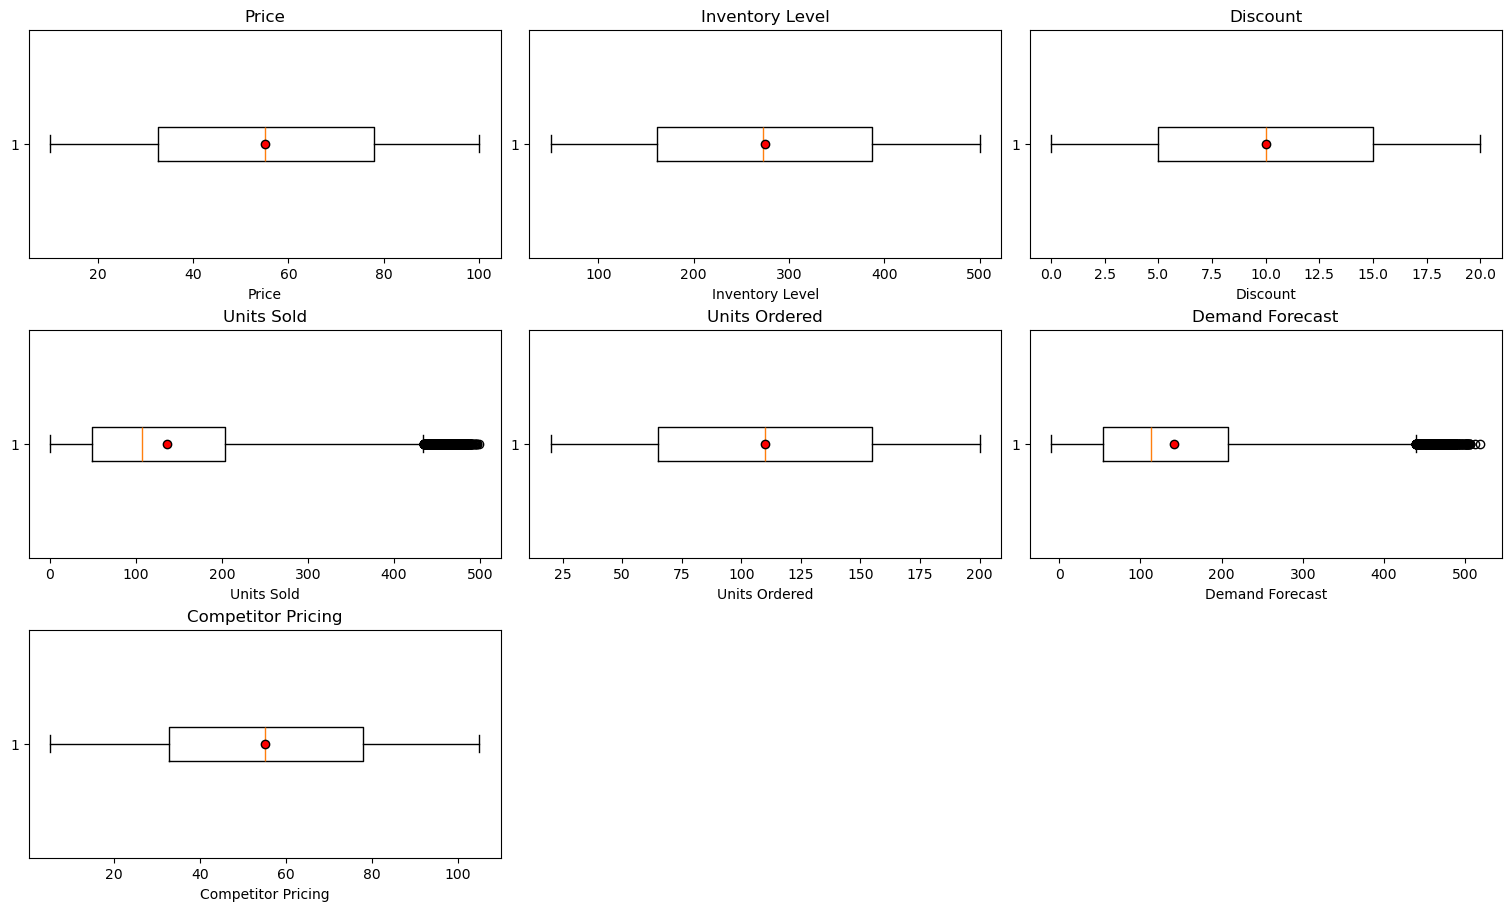

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4), constrained_layout=True)

cols = ['Price', 'Inventory Level', 'Discount', 'Units Sold', 'Units Ordered','Demand Forecast','Competitor Pricing']
ncols = 3
nrows = math.ceil(len(cols) / ncols)

# Close any previous figures to avoid duplicate/empty outputs
plt.close('all')

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 3*nrows), constrained_layout=True)
axes = axes.flatten()  # make indexing linear

for i, col in enumerate(cols):
    axes[i].boxplot(df[col].dropna(), vert=False, showmeans=True,
                    meanprops=dict(marker='o', markerfacecolor='r', markeredgecolor='k'))
    axes[i].set_title(col)
    axes[i].set_xlabel(col)

# Hide any unused axes (for a 2x3 grid with 5 plots this hides one axis)
for ax in axes[len(cols):]:
    ax.set_visible(False)

plt.show()

## Deep Analysis about outliers

### Unit Sold

In [10]:
df["Units Sold"].describe()

count    73100.000000
mean       136.464870
std        108.919406
min          0.000000
25%         49.000000
50%        107.000000
75%        203.000000
max        499.000000
Name: Units Sold, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7cfe7703b8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7cfe7703bd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cfe7703b5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7cfe770643d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cfe770646d0>],
 'means': []}

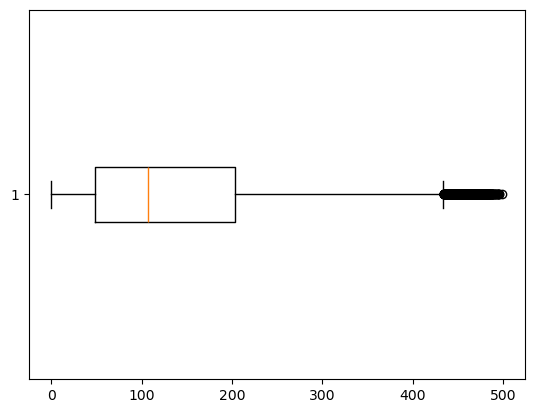

In [11]:
plt.boxplot(df["Units Sold"],vert=False)

In [12]:
Q1 = df['Units Sold'].quantile(0.25)
Q3 = df['Units Sold'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_outliers = df[df['Units Sold'] < lower_bound]['Units Sold'].count()

# Outliers above the upper bound
upper_outliers = df[df['Units Sold'] > upper_bound]['Units Sold'].count()

# Total count
total_outliers = lower_outliers + upper_outliers

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Outlier Bound (1.5 * IQR): {lower_bound}")
print(f"Upper Outlier Bound (1.5 * IQR): {upper_bound}")
print(f"\nTotal Outliers Detected: {total_outliers}")
print(f"Percentage of Outliers: {total_outliers / len(df) * 100:.2f}%")

Q1 (25th percentile): 49.0
Q3 (75th percentile): 203.0
IQR: 154.0
Lower Outlier Bound (1.5 * IQR): -182.0
Upper Outlier Bound (1.5 * IQR): 434.0

Total Outliers Detected: 715
Percentage of Outliers: 0.98%


-  FLAGGINNG (Context Preservation)
-  Create the binary flag based on the original data (df['Units Sold']).

### Flagging and Capping for Units Sold Outliers

In [13]:
## Flagging for Units Sold Outliers
df['Units Sold Outlier Flag'] = np.where((df['Units Sold'] < lower_bound) | (df['Units Sold'] > upper_bound), 1, 0)

## starting capping
## capping for the upper bound
df['Units Sold'] = np.where(
    df['Units Sold'] > upper_bound,
    upper_bound,
    df['Units Sold']
)

## capping for the lower bound
final_lower_bound = max(0, lower_bound) ## ensure no negative values
df['Units Sold'] = np.where(
    df['Units Sold'] < final_lower_bound,
    final_lower_bound,
    df['Units Sold']
)

print("\n✅ Capping and Flagging Complete.")
print(f"New feature 'Units_Sold_Outlier_Flag' created.")
print(f"Units Sold column capped between {final_lower_bound:.2f} and {upper_bound:.2f}.")


✅ Capping and Flagging Complete.
New feature 'Units_Sold_Outlier_Flag' created.
Units Sold column capped between 0.00 and 434.00.


### Demand Forecast 

In [14]:
df["Demand Forecast"].describe()

count    73100.000000
mean       141.494720
std        109.254076
min         -9.990000
25%         53.670000
50%        113.015000
75%        208.052500
max        518.550000
Name: Demand Forecast, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7cfe77097f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7cfe770c4430>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cfe77097c10>],
 'medians': [<matplotlib.lines.Line2D at 0x7cfe770c4a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cfe770c4d30>],
 'means': []}

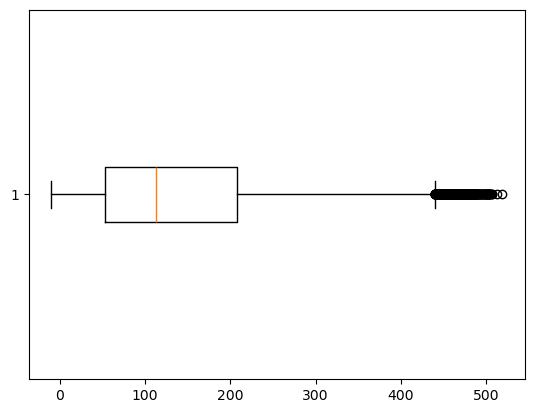

In [15]:
plt.boxplot(df["Demand Forecast"],vert=False)

In [16]:
Q1 = df['Demand Forecast'].quantile(0.25)
Q3 = df['Demand Forecast'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_outliers = df[df['Demand Forecast'] < lower_bound]['Demand Forecast'].count()

# Outliers above the upper bound
upper_outliers = df[df['Demand Forecast'] > upper_bound]['Demand Forecast'].count()

# Total count
total_outliers = lower_outliers + upper_outliers

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Outlier Bound (1.5 * IQR): {lower_bound}")
print(f"Upper Outlier Bound (1.5 * IQR): {upper_bound}")
print(f"\nTotal Outliers Detected: {total_outliers}")
print(f"Percentage of Outliers: {total_outliers / len(df) * 100:.2f}%")

Q1 (25th percentile): 53.67
Q3 (75th percentile): 208.0525
IQR: 154.3825
Lower Outlier Bound (1.5 * IQR): -177.90375
Upper Outlier Bound (1.5 * IQR): 439.62625

Total Outliers Detected: 732
Percentage of Outliers: 1.00%


### Flagging and Capping Demand Forecast Outliers

In [17]:
## Flagging for Demand Forecast Outliers
df['Demand Forecast Outlier Flag'] = np.where((df['Demand Forecast'] < lower_bound) | (df['Demand Forecast'] > upper_bound), 1, 0)

## starting capping
## capping for the upper bound
df['Demand Forecast'] = np.where(
    df['Demand Forecast'] > upper_bound,
    upper_bound,
    df['Demand Forecast']
)

## capping for the lower bound
final_lower_bound = max(0, lower_bound) ## ensure no negative values
df['Demand Forecast'] = np.where(
    df['Demand Forecast'] < final_lower_bound,
    final_lower_bound,
    df['Demand Forecast']
)

print("\n✅ Capping and Flagging Complete.")
print(f"New feature 'Demand_Forecast_Outlier_Flag' created.")
print(f"Demand Forecast column capped between {final_lower_bound:.2f} and {upper_bound:.2f}.")


✅ Capping and Flagging Complete.
New feature 'Demand_Forecast_Outlier_Flag' created.
Demand Forecast column capped between 0.00 and 439.63.


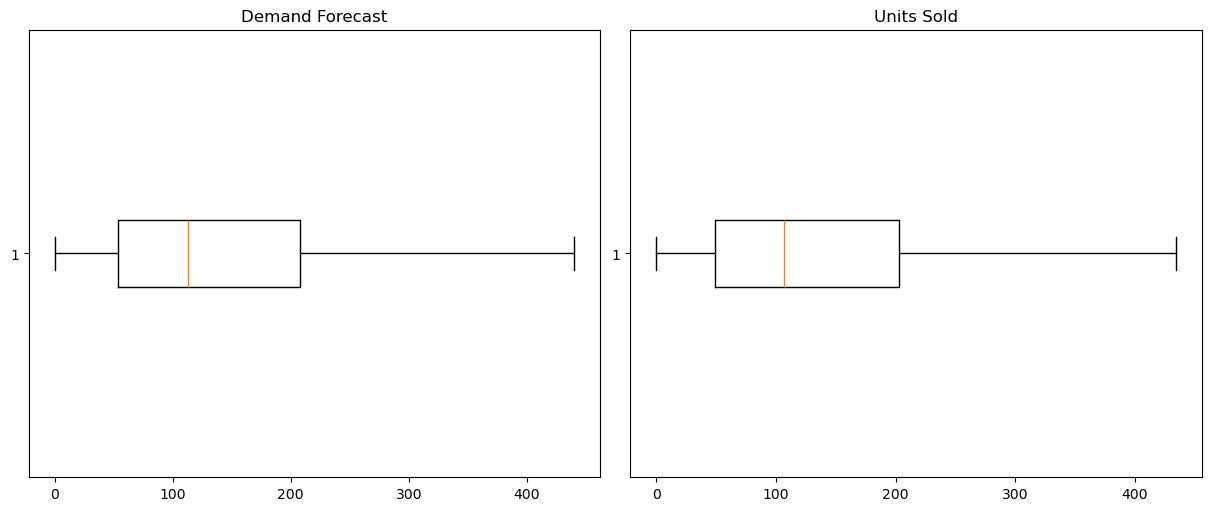

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), constrained_layout=True)

axes[0].boxplot(df["Demand Forecast"], vert=False)
axes[0].set_title("Demand Forecast")

axes[1].boxplot(df["Units Sold"], vert=False)
axes[1].set_title("Units Sold")

plt.show()

- Outliyers are gone now 

### Date-Based Feature Extraction

In [19]:
df['Day_of_week'] = df['Date'].dt.dayofweek
df['day_of_month'] = df['Date'].dt.day
df['day_of_year'] = df['Date'].dt.dayofyear
df['week_of_year'] = df['Date'].dt.isocalendar().week
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['quarter'] = df['Date'].dt.quarter
df['is_weekend'] = df['Day_of_week'].isin([5, 6]).astype(int)

In [20]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,Units Sold Outlier Flag,Demand Forecast Outlier Flag,Day_of_week,day_of_month,day_of_year,week_of_year,month,year,quarter,is_weekend
0,2022-01-01,S001,P0001,Groceries,North,231,127.0,55,135.47,33.50,...,0,0,5,1,1,52,1,2022,1,1
1,2022-01-01,S001,P0002,Toys,South,204,150.0,66,144.04,63.01,...,0,0,5,1,1,52,1,2022,1,1
2,2022-01-01,S001,P0003,Toys,West,102,65.0,51,74.02,27.99,...,0,0,5,1,1,52,1,2022,1,1
3,2022-01-01,S001,P0004,Toys,North,469,61.0,164,62.18,32.72,...,0,0,5,1,1,52,1,2022,1,1
4,2022-01-01,S001,P0005,Electronics,East,166,14.0,135,9.26,73.64,...,0,0,5,1,1,52,1,2022,1,1


## Cyclical Feature Encoding (for Season , Month , Days)

In [21]:
#month
df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
df['month_cos'] = np.cos(2 * np.pi * df['month']/12)

#day of week
df['day_of_week_sin'] = np.sin(2 * np.pi * df['Day_of_week']/7)
df['day_of_week_cos'] = np.cos(2 * np.pi * df['Day_of_week']/7)

#day of month
df['day_of_month_sin'] = np.sin(2 * np.pi * df['day_of_month']/30.5)  ## average days in month
df['day_of_month_cos'] = np.cos(2 * np.pi * df['day_of_month']/30.5)

#day of year
df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year']/365.25) ## accounting leap years
df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year']/365.25)

#Week of year
df['week_of_year_sin'] = np.sin(2 * np.pi * df['week_of_year']/52)
df['week_of_year_cos'] = np.cos(2 * np.pi * df['week_of_year']/52)

In [22]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,month_sin,month_cos,day_of_week_sin,day_of_week_cos,day_of_month_sin,day_of_month_cos,day_of_year_sin,day_of_year_cos,week_of_year_sin,week_of_year_cos
0,2022-01-01,S001,P0001,Groceries,North,231,127.0,55,135.47,33.50,...,0.5,0.866025,-0.974928,-0.222521,0.204552,0.978856,0.017202,0.999852,0.0,1.0
1,2022-01-01,S001,P0002,Toys,South,204,150.0,66,144.04,63.01,...,0.5,0.866025,-0.974928,-0.222521,0.204552,0.978856,0.017202,0.999852,0.0,1.0
2,2022-01-01,S001,P0003,Toys,West,102,65.0,51,74.02,27.99,...,0.5,0.866025,-0.974928,-0.222521,0.204552,0.978856,0.017202,0.999852,0.0,1.0
3,2022-01-01,S001,P0004,Toys,North,469,61.0,164,62.18,32.72,...,0.5,0.866025,-0.974928,-0.222521,0.204552,0.978856,0.017202,0.999852,0.0,1.0
4,2022-01-01,S001,P0005,Electronics,East,166,14.0,135,9.26,73.64,...,0.5,0.866025,-0.974928,-0.222521,0.204552,0.978856,0.017202,0.999852,0.0,1.0


### Interaction Features

In [23]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality', 'Units Sold Outlier Flag',
       'Demand Forecast Outlier Flag', 'Day_of_week', 'day_of_month',
       'day_of_year', 'week_of_year', 'month', 'year', 'quarter', 'is_weekend',
       'month_sin', 'month_cos', 'day_of_week_sin', 'day_of_week_cos',
       'day_of_month_sin', 'day_of_month_cos', 'day_of_year_sin',
       'day_of_year_cos', 'week_of_year_sin', 'week_of_year_cos'],
      dtype='object')

In [24]:
df['price_discount_interaction'] = df['Price'] * df['Discount']
df['Inventory_sales_ratio'] = df['Inventory Level'] / (df['Units Sold'] + 1)  # +1 to avoid division by zero
df['price_vs_competitor_price_gap'] = df['Price'] - df['Competitor Pricing']
df['price_gap_pct'] = df['price_vs_competitor_price_gap'] / df['Competitor Pricing'] * 100
df["forcast_accuracy_pct"] = np.abs(df['Demand Forecast'] - df['Units Sold']) / (df['Units Sold'] + 1) * 100  # +1 to avoid division by zero

In [25]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,day_of_month_cos,day_of_year_sin,day_of_year_cos,week_of_year_sin,week_of_year_cos,price_discount_interaction,Inventory_sales_ratio,price_vs_competitor_price_gap,price_gap_pct,forcast_accuracy_pct
0,2022-01-01,S001,P0001,Groceries,North,231,127.0,55,135.47,33.50,...,0.978856,0.017202,0.999852,0.0,1.0,670.0,1.804688,3.81,12.832604,6.617187
1,2022-01-01,S001,P0002,Toys,South,204,150.0,66,144.04,63.01,...,0.978856,0.017202,0.999852,0.0,1.0,1260.2,1.350993,-3.15,-4.761185,3.947020
2,2022-01-01,S001,P0003,Toys,West,102,65.0,51,74.02,27.99,...,0.978856,0.017202,0.999852,0.0,1.0,279.9,1.545455,-3.33,-10.632184,13.666667
3,2022-01-01,S001,P0004,Toys,North,469,61.0,164,62.18,32.72,...,0.978856,0.017202,0.999852,0.0,1.0,327.2,7.564516,-2.02,-5.814623,1.903226
4,2022-01-01,S001,P0005,Electronics,East,166,14.0,135,9.26,73.64,...,0.978856,0.017202,0.999852,0.0,1.0,0.0,11.066667,4.69,6.802030,31.600000


### Domain-specific-Features

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df['Inventory_turnover_for_day'] = df['Units Sold'] / (df['Inventory Level'] + 1)  # +1 to avoid division by zero

rolling_sales_for_week = df.groupby(['Store ID','Product ID'])['Units Sold'].transform(lambda x: x.rolling(window=7, min_periods=1).sum())
rolling_inventory_for_week = df.groupby(['Store ID','Product ID'])['Inventory Level'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

df['Inventory_turnover_for_week'] = rolling_sales_for_week / (rolling_inventory_for_week + 1)  # +1 to avoid division by zero

rolling_sales_for_year = df.groupby(['Store ID','Product ID'])['Units Sold'].transform(lambda x: x.rolling(window=365, min_periods=1).sum())
rolling_inventory_for_year = df.groupby(['Store ID','Product ID'])['Inventory Level'].transform(lambda x: x.rolling(window=365, min_periods=1).mean())  

df['Inventory_turnover_for_year'] = rolling_sales_for_year / (rolling_inventory_for_year + 1)  # +1 to avoid division by zero


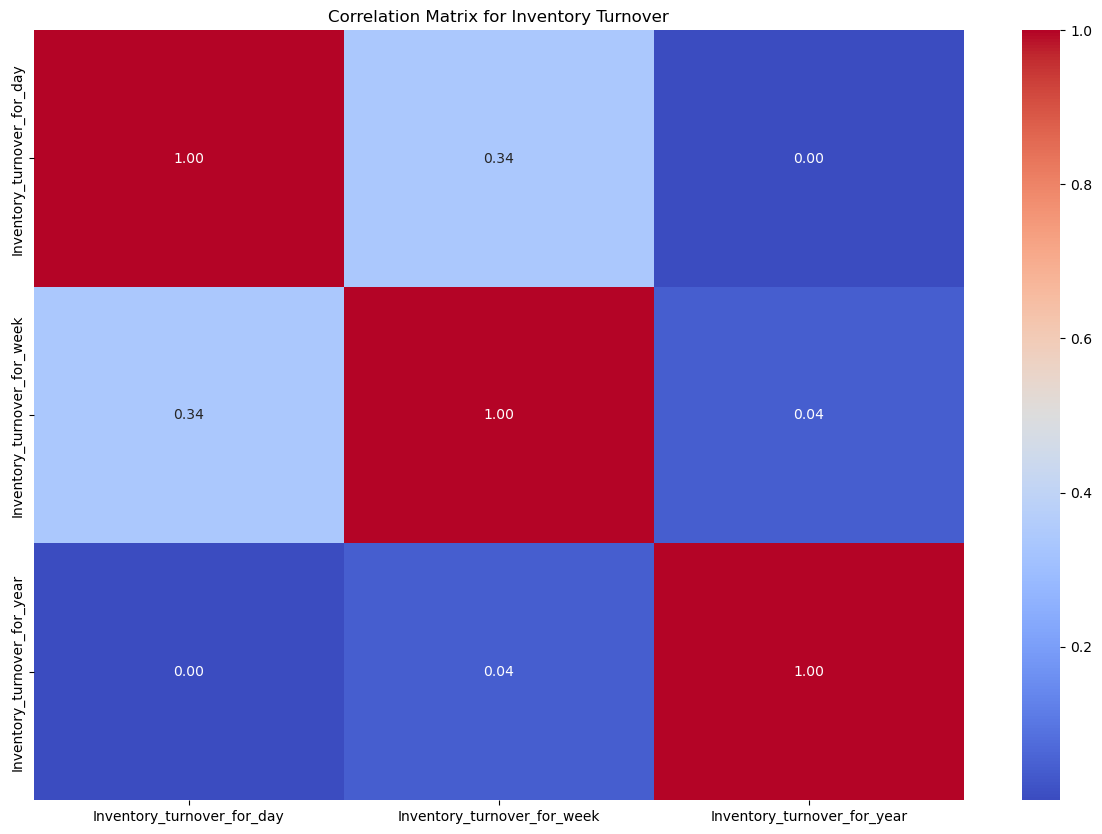

In [28]:
inventory_turnover_cols = [
    'Inventory_turnover_for_day',
    'Inventory_turnover_for_week',
    'Inventory_turnover_for_year'
]

matrix = df[inventory_turnover_cols].corr().abs()

plt.figure(figsize=(15, 10))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Inventory Turnover')
plt.show()


In [29]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality', 'Units Sold Outlier Flag',
       'Demand Forecast Outlier Flag', 'Day_of_week', 'day_of_month',
       'day_of_year', 'week_of_year', 'month', 'year', 'quarter', 'is_weekend',
       'month_sin', 'month_cos', 'day_of_week_sin', 'day_of_week_cos',
       'day_of_month_sin', 'day_of_month_cos', 'day_of_year_sin',
       'day_of_year_cos', 'week_of_year_sin', 'week_of_year_cos',
       'price_discount_interaction', 'Inventory_sales_ratio',
       'price_vs_competitor_price_gap', 'price_gap_pct',
       'forcast_accuracy_pct', 'Inventory_turnover_for_day',
       'Inventory_turnover_for_week', 'Inventory_turnover_for_year'],
      dtype='object')

In [30]:
# --- for 7 day ---
df['Demand_Forecast_next_7day'] = df.groupby(['Store ID', 'Product ID'])['Demand Forecast'].transform(
    lambda x: x.rolling(window=7, min_periods=1).sum().shift(-6)
)

# Added '=' and fixed the logic (Understocked = Inventory < Forecast)
df['is_understocked_for_week'] = (df['Inventory Level'] < df['Demand_Forecast_next_7day']).astype(int)
df['is_overstocked_for_week'] = (df['Inventory Level'] > df['Demand_Forecast_next_7day']).astype(int)


# --- for month ---
df['Demand_Forecast_next_month'] = df.groupby(['Store ID', 'Product ID'])['Demand Forecast'].transform(
    lambda x: x.rolling(window=30, min_periods=1).sum().shift(-29)
)

# Added '=' and fixed the logic
df['is_understocked_for_month'] = (df['Inventory Level'] < df['Demand_Forecast_next_month']).astype(int)
df['is_overstocked_for_month'] = (df['Inventory Level'] > df['Demand_Forecast_next_month']).astype(int)

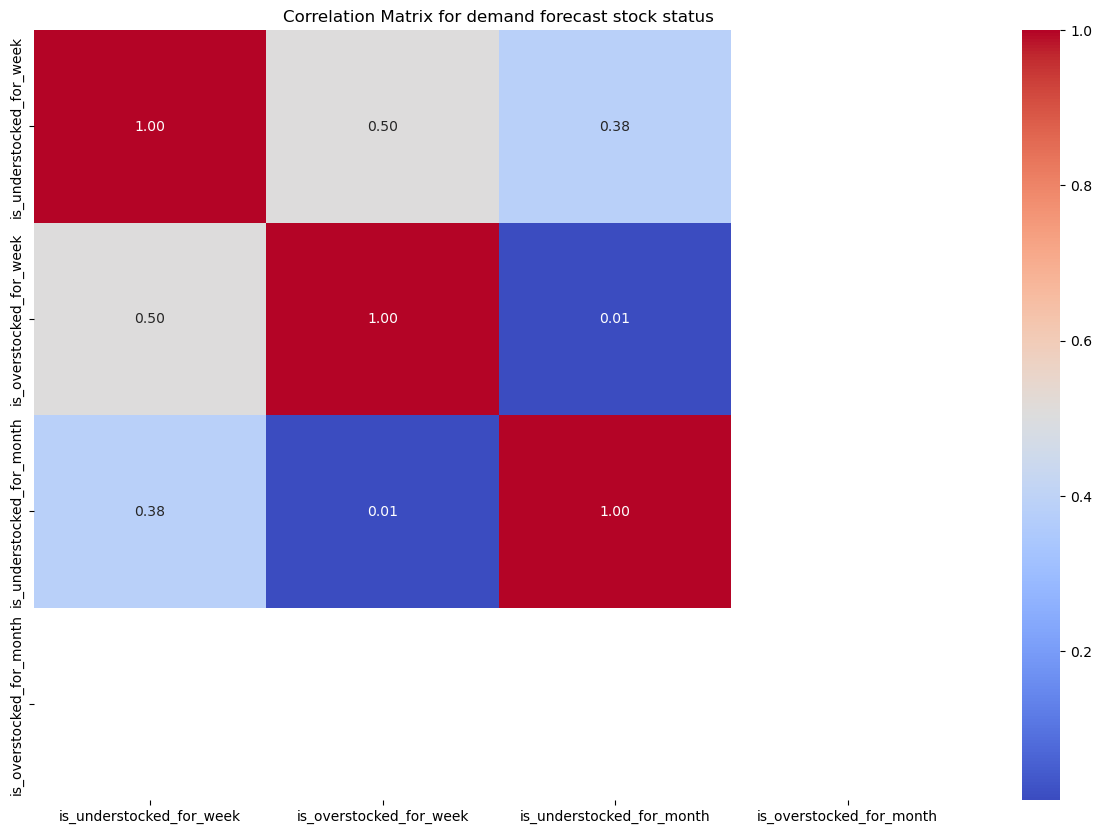

In [31]:
stock_status_cols = [
    'is_understocked_for_week', 'is_overstocked_for_week',
    'is_understocked_for_month', 'is_overstocked_for_month'
]

matrix = df[stock_status_cols].corr().abs()

plt.figure(figsize=(15, 10))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for demand forecast stock status')
plt.show()

In [32]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality', 'Units Sold Outlier Flag',
       'Demand Forecast Outlier Flag', 'Day_of_week', 'day_of_month',
       'day_of_year', 'week_of_year', 'month', 'year', 'quarter', 'is_weekend',
       'month_sin', 'month_cos', 'day_of_week_sin', 'day_of_week_cos',
       'day_of_month_sin', 'day_of_month_cos', 'day_of_year_sin',
       'day_of_year_cos', 'week_of_year_sin', 'week_of_year_cos',
       'price_discount_interaction', 'Inventory_sales_ratio',
       'price_vs_competitor_price_gap', 'price_gap_pct',
       'forcast_accuracy_pct', 'Inventory_turnover_for_day',
       'Inventory_turnover_for_week', 'Inventory_turnover_for_year',
       'Demand_Forecast_next_7day', 'is_understocked_for_week',
       'is_overstocked_for_week', 'Demand_Forecast_nex

In [34]:
df['revenue'] = df['Price'] * df['Units Sold']
# Create a 7-day LAGGED revenue (Total sales value from last week)
# This is safe because it uses past data, not current day data.
df['revenue_last_7d'] = df.groupby(['Store ID', 'Product ID'])['revenue'].transform(
    lambda x: x.rolling(window=7, min_periods=1).sum().shift(1)
)

# Create a 30-day LAGGED revenue (To show "Product Importance")
df['revenue_last_30d'] = df.groupby(['Store ID', 'Product ID'])['revenue'].transform(
    lambda x: x.rolling(window=30, min_periods=1).sum().shift(1)
)

# Remove temporary 'revenue' column
df.drop(columns=['revenue'], inplace=True)

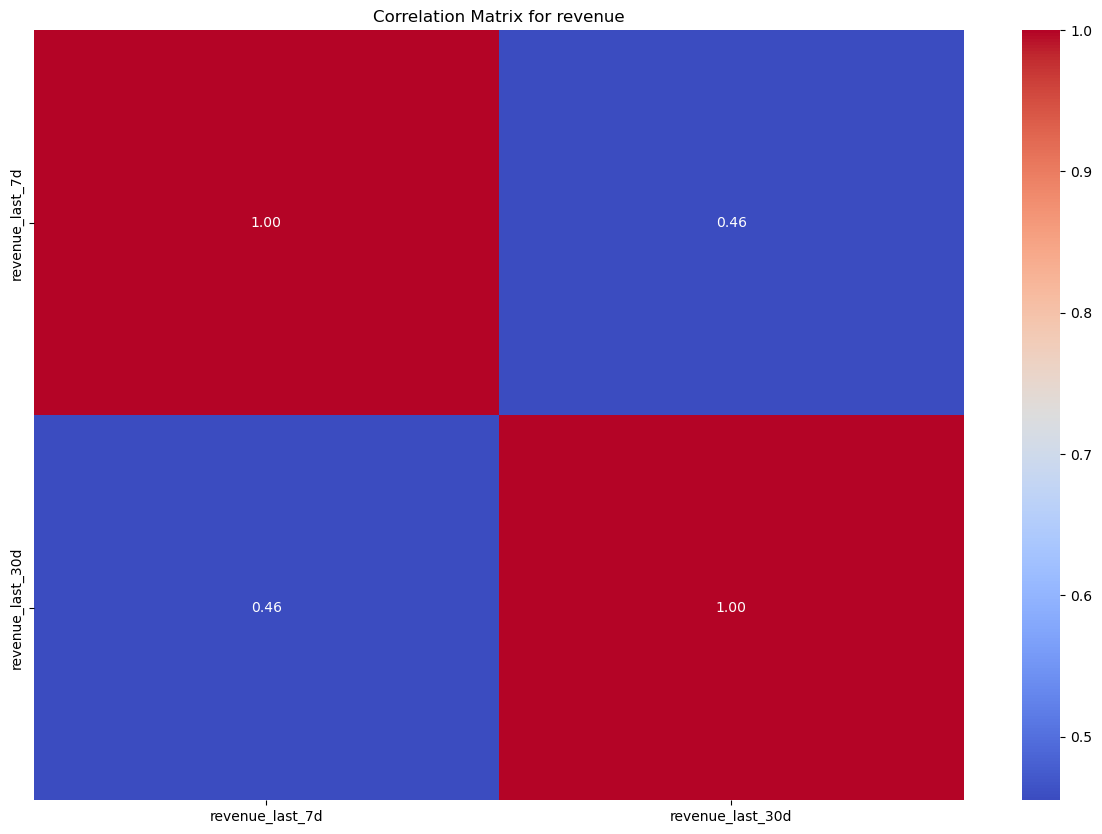

In [35]:
revenue = [
    "revenue_last_7d",
    "revenue_last_30d"
]

matrix = df[revenue].corr().abs()

plt.figure(figsize=(15, 10))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for revenue')
plt.show()

### Promotional Impact

In [36]:
df['promotion_with_holiday'] = df['Holiday/Promotion'] * df['Discount']


# Days since last promotion (cumulative)
df['days_since_promo'] = df.groupby(['Store ID', 'Product ID'])['Holiday/Promotion'].transform(lambda x: (~x.astype(bool)).cumsum()
)

### Weather-Based Feaetures

In [37]:
df['Weather Condition'].unique()

array(['Rainy', 'Sunny', 'Cloudy', 'Snowy'], dtype=object)

In [38]:
df['Holiday/Promotion'].unique()

array([0, 1])

In [ ]:
# Encode weather as binary
df['is_rainy'] = (df['Weather Condition'] == 'Rainy').astype(int)
df['is_sunny'] = (df['Weather Condition'] == 'Sunny').astype(int)
df['is_cloudy'] = (df['Weather Condition'] == 'Cloudy').astype(int)
df['is_snowy'] = (df['Weather Condition'] == 'Snowy').astype(int)

for col in ['is_rainy', 'is_sunny', 'is_cloudy', 'is_snowy']:
    print(f'Total {col} rows: {df[col].sum()} out of {len(df)}')

    print(f'Total {col} percentage: {df[col].sum()/len(df) * 100:.2f}%')
    print(f'{col} row with Holiday/Promotion: {df[df["Holiday/Promotion"] == 1][col].sum()} out of {df[col].sum()}')
    print(f'Total {col} percentage with holiday/promotion: {(df[df["Holiday/Promotion"] == 1][col].sum() / df[col].sum()) * 100:.2f}%')
    print('-----------------------------------------------')



Total is_rainy rows: 18278 out of 73100
Total is_rainy percentage: 25.00%
is_rainy row with Holiday/Promotion: 9052 out of 18278
Total is_rainy percentage with holiday/promotion: 49.52%
-----------------------------------------------
Total is_sunny rows: 18290 out of 73100
Total is_sunny percentage: 25.02%
is_sunny row with Holiday/Promotion: 9080 out of 18290
Total is_sunny percentage with holiday/promotion: 49.64%
-----------------------------------------------
Total is_cloudy rows: 18260 out of 73100
Total is_cloudy percentage: 24.98%
is_cloudy row with Holiday/Promotion: 9141 out of 18260
Total is_cloudy percentage with holiday/promotion: 50.06%
-----------------------------------------------
Total is_snowy rows: 18272 out of 73100
Total is_snowy percentage: 25.00%
is_snowy row with Holiday/Promotion: 9080 out of 18272
Total is_snowy percentage with holiday/promotion: 49.69%
-----------------------------------------------


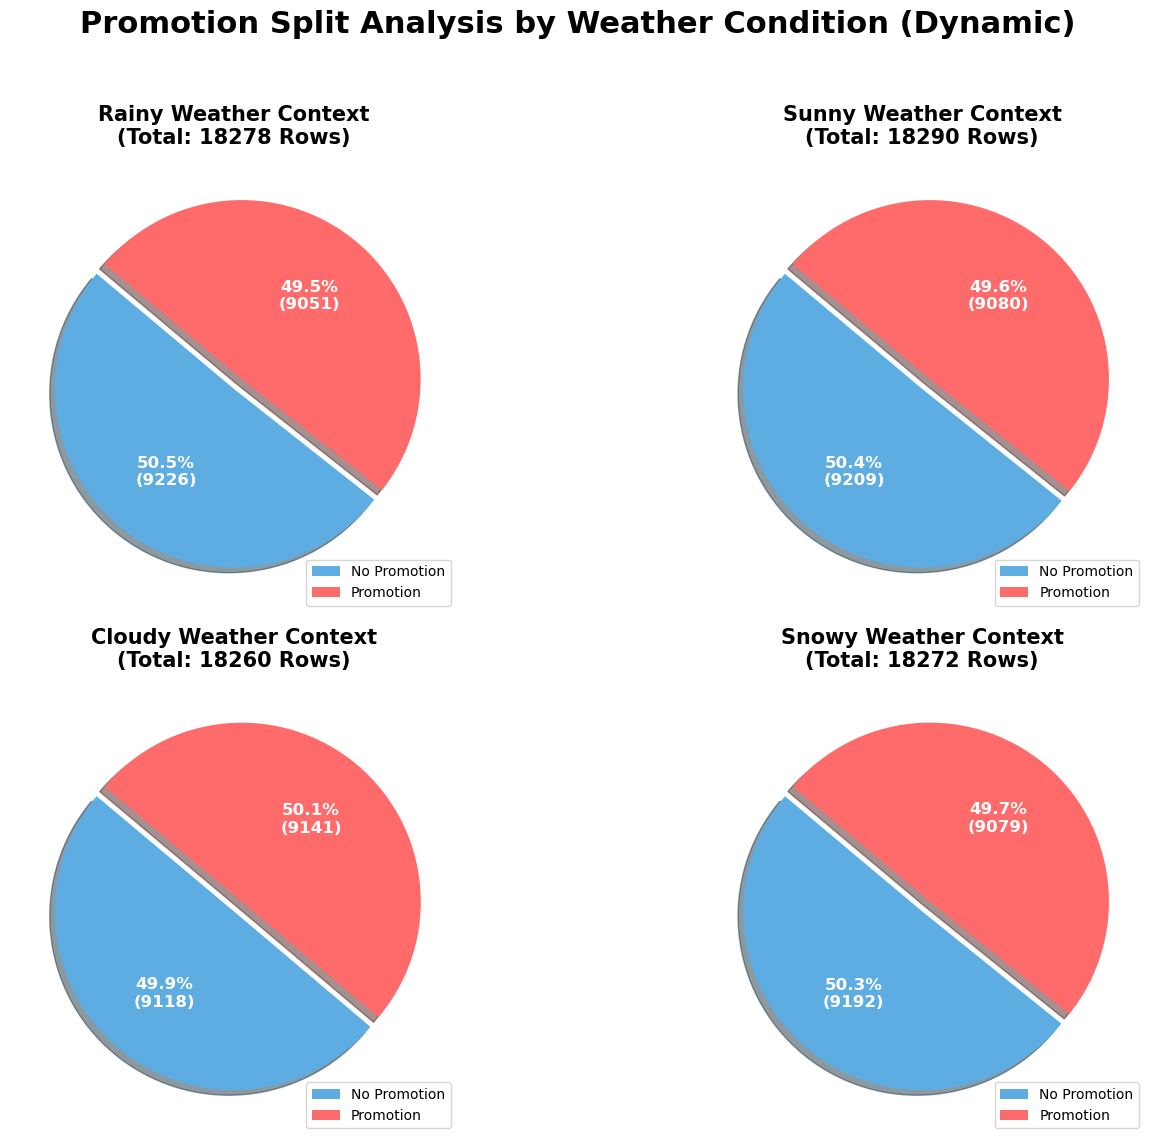

In [40]:
import matplotlib.pyplot as plt

# 1. Define the weather categories you want to plot
# Using the list of binary columns you created
weather_cols = ['is_rainy', 'is_sunny', 'is_cloudy', 'is_snowy']
weather_names = ['Rainy', 'Sunny', 'Cloudy', 'Snowy']

# 2. Setup the figure grid (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# Colors and style
colors = ['#5DADE2', '#FF6B6B'] # Blue for No Promo, Red for Promo
explode = (0, 0.07)  # "Pop out" the Promotion slice

for i, (col, name) in enumerate(zip(weather_cols, weather_names)):
    # Dynamically get counts from the dataframe
    total_weather_rows = df[col].sum()
    
    # Filter df for this specific weather and count promotions
    promo_data = df[df[col] == 1]['Holiday/Promotion'].value_counts().sort_index()
    
    # Ensure both 0 (No Promo) and 1 (Promo) exist in the counts to avoid errors
    no_promo_count = promo_data.get(0, 0)
    promo_count = promo_data.get(1, 0)
    
    # Data for the pie
    labels = ['No Promotion', 'Promotion']
    sizes = [no_promo_count, promo_count]
    
    # Plotting
    axes[i].pie(sizes, 
                explode=explode, 
                colors=colors, 
                # p is the percentage, total_weather_rows is the count
                autopct=lambda p: f'{p:.1f}%\n({int(p*total_weather_rows/100)})',
                shadow=True, 
                startangle=140,
                textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'white'})
    
    # Dynamic Title
    axes[i].set_title(f'{name} Weather Context\n(Total: {total_weather_rows} Rows)', 
                      fontsize=15, fontweight='bold', pad=15)
    axes[i].legend(labels, loc="lower right", fontsize=10)

# Final formatting
plt.suptitle('Promotion Split Analysis by Weather Condition (Dynamic)', fontsize=22, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('weather_promo_pie_dynamic.png', dpi=300)
plt.show()

In [41]:
# Create the Weather + Promotion Interaction Features
df['rainy_with_promotion'] = df['is_rainy'] * df['Holiday/Promotion']
df['sunny_with_promotion'] = df['is_sunny'] * df['Holiday/Promotion']
df['cloudy_with_promotion'] = df['is_cloudy'] * df['Holiday/Promotion']
df['snowy_with_promotion'] = df['is_snowy'] * df['Holiday/Promotion']

### Seasonality-Based Features

In [42]:
# Already have 'Seasonality' column, but encode it
df['is_summer'] = (df['Seasonality'] == 'Summer').astype(int)
df['is_winter'] = (df['Seasonality'] == 'Winter').astype(int)
df['is_spring'] = (df['Seasonality'] == 'Spring').astype(int)
df['is_autumn'] = (df['Seasonality'] == 'Autumn').astype(int)

# Seasonal multiplier for demand
df['seasonal_demand_mult'] = df['Demand Forecast'] / (df['Demand Forecast'].mean() + 1)  # +1 to avoid division by zero

### Trend features

In [43]:
# Moving average (3-day, 7-day, 30-day) - similar to rolling mean but simpler
df['ma_3'] = df.groupby(['Store ID', 'Product ID','Date'])['Units Sold'].transform(
    lambda x: x.rolling(3, min_periods=1).mean()
)
df['ma_7'] = df.groupby(['Store ID', 'Product ID'])['Units Sold'].transform(
    lambda x: x.rolling(7, min_periods=1).mean()
)

df['ma_30'] = df.groupby(['Store ID', 'Product ID'])['Units Sold'].transform(
    lambda x: x.rolling(30, min_periods=1).mean()
)

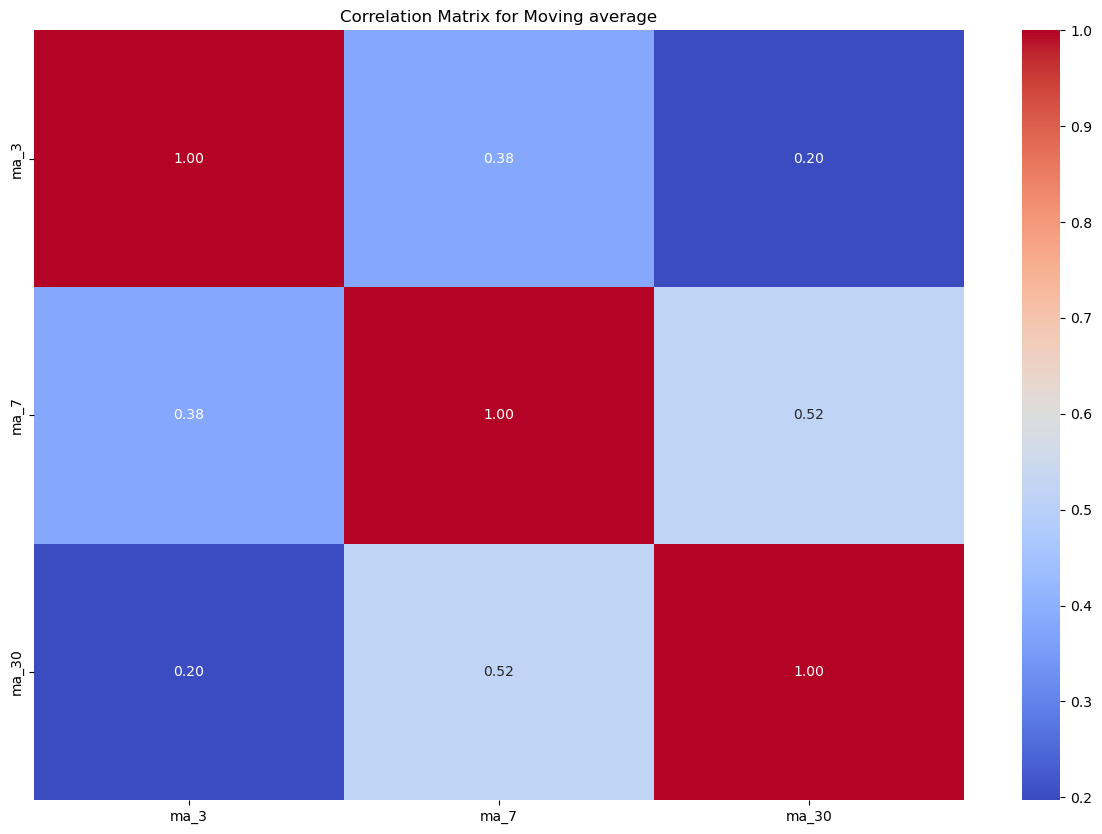

In [44]:
MA = [
    "ma_3",
    "ma_7",
    "ma_30"
]

matrix = df[MA].corr().abs()

plt.figure(figsize=(15, 10))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Moving average')
plt.show()

In [45]:
# Price competitiveness
df['is_cheaper_than_competitor'] = (df['Price'] < df['Competitor Pricing']).astype(int)
df['price_premium'] = (df['Price'] - df['Competitor Pricing']) / df['Competitor Pricing']

# Discount vs competitor (proxy)
df['discount_competitiveness'] = df['Discount'] / (df['Competitor Pricing'] * 0.1 + 1)

In [46]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality', 'Units Sold Outlier Flag',
       'Demand Forecast Outlier Flag', 'Day_of_week', 'day_of_month',
       'day_of_year', 'week_of_year', 'month', 'year', 'quarter', 'is_weekend',
       'month_sin', 'month_cos', 'day_of_week_sin', 'day_of_week_cos',
       'day_of_month_sin', 'day_of_month_cos', 'day_of_year_sin',
       'day_of_year_cos', 'week_of_year_sin', 'week_of_year_cos',
       'price_discount_interaction', 'Inventory_sales_ratio',
       'price_vs_competitor_price_gap', 'price_gap_pct',
       'forcast_accuracy_pct', 'Inventory_turnover_for_day',
       'Inventory_turnover_for_week', 'Inventory_turnover_for_year',
       'Demand_Forecast_next_7day', 'is_understocked_for_week',
       'is_overstocked_for_week', 'Demand_Forecast_nex